# Step 0 Import Packages

In [17]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Step 1 Import Data

In [18]:
file = 'C:\\Users\\-\\Documents\\GitHub\\Project\\Data\\Facebook_Ads_2.csv'
training = pd.read_csv(file)

In [19]:
training.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


# Step 2 Explore & Visualize the Data

In [20]:
total = len(training)
clicked = len(training[training.Clicked==1])
no_click = len(training[training.Clicked==0])

In [21]:
print('Total = ',total)
print('Number of Customers who clicked on Ad= ',clicked)
print('% clicked = ',round(1.*clicked/total*100,2) )
print('Did not Click = ', no_click)
print('% no Click = ', round(1.*no_click/total*100,))

Total =  499
Number of Customers who clicked on Ad=  250
% clicked =  50.1
Did not Click =  249
% no Click =  50


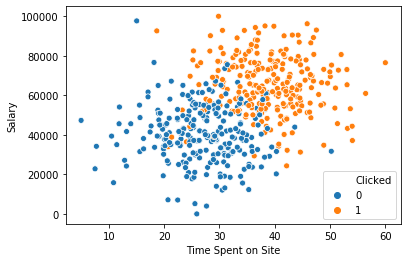

In [22]:
sns.scatterplot(x='Time Spent on Site', y='Salary', hue='Clicked',data=training,legend='brief')

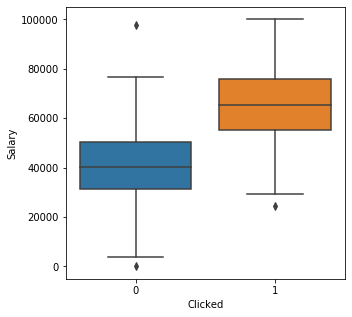

In [23]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Clicked',y='Salary',data=training)

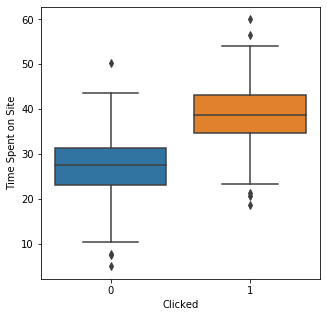

In [24]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Clicked',y='Time Spent on Site',data=training)

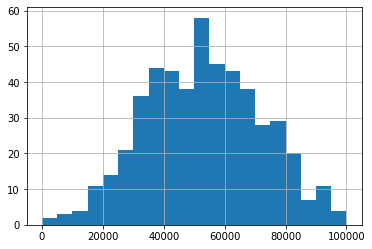

In [25]:
training.Salary.hist(bins=20)

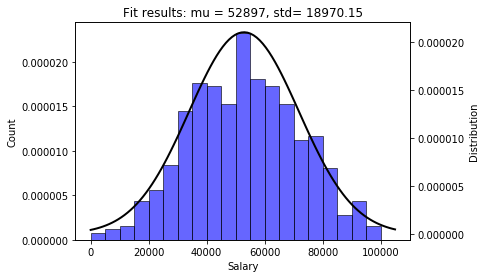

In [26]:
from scipy.stats import norm 
#fit a Normal Distribution Curve to the data
mu, std = norm.fit(training['Salary'])
#instantiate an axis object
fig, ax = plt.subplots()
#Create histogram for first axis object
ax.hist(training['Salary'], bins=20, density=True, 
        alpha=0.6, color='b',edgecolor='black')
#set x_label 
ax.set_xlabel('Salary')
#set Y axis label for the first graph
ax.set_ylabel('Count')
#get the X axis max and min
xmin,xmax = ax.get_xlim()
#create another axis object
ax2=ax.twinx()
#create an interval for norm pdf curve
x=np.linspace(0,xmax,100)
#get an output for the norm pdf based on input interval plus mean and std
p=norm.pdf(x,mu,std)
#plot the graph
ax2.plot(x,p,'k',linewidth=2)
#create a y_label for the second axis 
ax2.set_ylabel('Distribution')
#set a title 
title='Fit results: mu = %2.f, std= %.2f'%(mu,std)
plt.title(title)
#display graphs 
plt.show()

# Step 3 Data cleaning

In [27]:
data = training[['Time Spent on Site','Salary','Clicked']].copy()

In [28]:
data.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


In [29]:
pclass=data.Clicked
data= data.drop('Clicked',axis=1)
pclass.shape

(499,)

In [30]:
x=data.values
y=pclass.values
x.shape

(499, 2)

In [31]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(x)

In [32]:
x

array([[-7.99457658e-01,  1.28257713e-01],
       [-5.10286870e-02,  1.37859159e+00],
       [-1.31666684e+00, -6.21944817e-01],
       [ 2.32223270e+00, -8.30443624e-01],
       [ 1.46195572e-01, -8.19280959e-01],
       [ 2.09908496e+00,  1.46259598e+00],
       [ 1.09531908e+00,  4.75030899e-01],
       [-7.96458904e-01, -1.21483411e+00],
       [ 8.55264296e-01, -9.81324726e-01],
       [-3.55476114e-01, -6.21930555e-01],
       [ 3.87487311e-02,  6.48400206e-02],
       [ 1.77112538e-01, -1.19530208e+00],
       [-8.36398567e-01, -4.81440402e-01],
       [ 1.49769499e+00, -2.23166322e-01],
       [ 5.27406027e-01,  6.21976462e-01],
       [-8.64648371e-01, -1.85222918e+00],
       [ 8.98997888e-01, -1.81000774e-01],
       [-8.97110238e-01, -7.59750031e-01],
       [ 1.75384005e+00, -9.55319376e-01],
       [-5.59287751e-01, -6.60247498e-02],
       [-1.73917217e+00,  4.62029789e-01],
       [-8.05159264e-01,  3.86803184e-02],
       [ 1.02580543e+00, -1.09023371e+00],
       [ 4.

# Step 4 Model Training 

In [33]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
x_train.shape
x_test.shape

(100, 2)

In [35]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Step 5 Model Testing 

In [36]:
y_predict_train = classifier.predict(x_train)

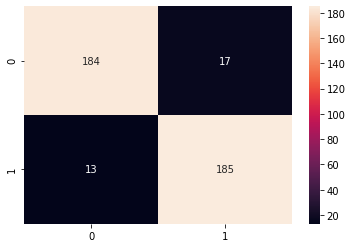

In [37]:
from sklearn.metrics import confusion_matrix, classification_report 
cm=confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm, annot=True,fmt='d')


              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



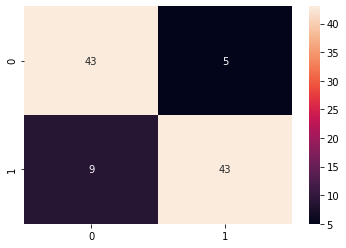

In [38]:
y_predict = classifier.predict(x_test)
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True,fmt='d')
print(classification_report(y_test,y_predict))

In [39]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train

ar1 = np.arange(start= x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step = 0.01)
ar2 = np.arange(start=x_set[:,1].min() -1, stop=x_set[:,1].max()+1, step=0.01)
#meshgrid is a rectangular grid created after feeding in two 1d arrays representing 
#the matrix index
#returns two 2d arrays representing the x,y coordinates of every point on 
#on the grid.
X1, X2 = np.meshgrid(ar1, ar2)


(-3.787379255660188, 3.3526207443396596)

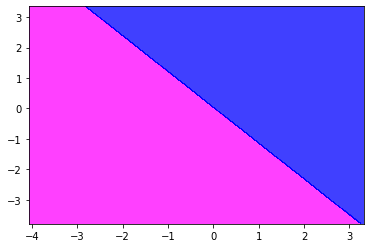

In [43]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('magenta','blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


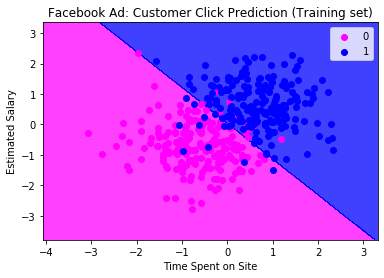

In [49]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('magenta','blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c = ListedColormap(('magenta','blue'))(i),label=j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


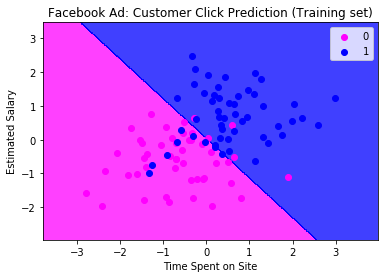

In [51]:
x_set, y_set = x_test, y_test

ar1 = np.arange(start= x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step = 0.01)
ar2 = np.arange(start=x_set[:,1].min() -1, stop=x_set[:,1].max()+1, step=0.01)
#meshgrid is a rectangular grid created after feeding in two 1d arrays representing 
#the matrix index
#returns two 2d arrays representing the x,y coordinates of every point on 
#on the grid.
X1, X2 = np.meshgrid(ar1, ar2)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75, cmap=ListedColormap(('magenta','blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c = ListedColormap(('magenta','blue'))(i),label=j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
